In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

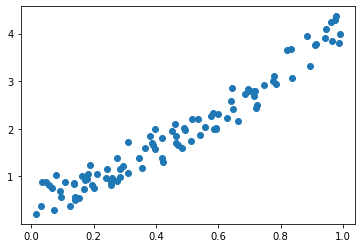

In [2]:
x = np.random.rand(100)
y = np.sin(x) * np.power(x,3) + 3*x + np.random.rand(100)*0.8

plt.scatter(x, y)
plt.show()

In [3]:
print(x)

[0.46273107 0.70195742 0.35567757 0.28567586 0.25697162 0.41816388
 0.71313293 0.59217471 0.64267348 0.64690217 0.78414519 0.77605152
 0.72072277 0.10807736 0.31030798 0.57641774 0.99116026 0.27584288
 0.07234112 0.01440471 0.41783553 0.83513645 0.38204244 0.17217353
 0.98631321 0.02967584 0.58249794 0.42281663 0.83316257 0.28479744
 0.69476134 0.07808838 0.96042668 0.20105781 0.96490509 0.1935575
 0.976285   0.25774343 0.66323077 0.38955563 0.15187286 0.13762172
 0.51348959 0.9740194  0.45051617 0.3100592  0.39753352 0.94250146
 0.71605586 0.17919262 0.04867774 0.49471654 0.12324158 0.03292514
 0.47167011 0.09441569 0.16162561 0.34660961 0.38691378 0.18072916
 0.49062388 0.89557346 0.91132496 0.53511713 0.63969796 0.77890411
 0.09270352 0.74568867 0.05815413 0.68504596 0.24407184 0.46434685
 0.29536922 0.23881967 0.36351583 0.54082467 0.39616516 0.2561562
 0.46282793 0.2112754  0.91302096 0.14132195 0.59170043 0.62760288
 0.16804821 0.48399569 0.72575316 0.88382751 0.27424735 0.187359

In [4]:
print(x.shape)

(100,)


In [5]:
print(x.reshape(-1,1))

[[0.46273107]
 [0.70195742]
 [0.35567757]
 [0.28567586]
 [0.25697162]
 [0.41816388]
 [0.71313293]
 [0.59217471]
 [0.64267348]
 [0.64690217]
 [0.78414519]
 [0.77605152]
 [0.72072277]
 [0.10807736]
 [0.31030798]
 [0.57641774]
 [0.99116026]
 [0.27584288]
 [0.07234112]
 [0.01440471]
 [0.41783553]
 [0.83513645]
 [0.38204244]
 [0.17217353]
 [0.98631321]
 [0.02967584]
 [0.58249794]
 [0.42281663]
 [0.83316257]
 [0.28479744]
 [0.69476134]
 [0.07808838]
 [0.96042668]
 [0.20105781]
 [0.96490509]
 [0.1935575 ]
 [0.976285  ]
 [0.25774343]
 [0.66323077]
 [0.38955563]
 [0.15187286]
 [0.13762172]
 [0.51348959]
 [0.9740194 ]
 [0.45051617]
 [0.3100592 ]
 [0.39753352]
 [0.94250146]
 [0.71605586]
 [0.17919262]
 [0.04867774]
 [0.49471654]
 [0.12324158]
 [0.03292514]
 [0.47167011]
 [0.09441569]
 [0.16162561]
 [0.34660961]
 [0.38691378]
 [0.18072916]
 [0.49062388]
 [0.89557346]
 [0.91132496]
 [0.53511713]
 [0.63969796]
 [0.77890411]
 [0.09270352]
 [0.74568867]
 [0.05815413]
 [0.68504596]
 [0.24407184]
 [0.46

In [9]:
print(x.reshape(-1,1).shape)

torch.Size([100, 1])


In [6]:
x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()
print(x, y)

tensor([[0.4627],
        [0.7020],
        [0.3557],
        [0.2857],
        [0.2570],
        [0.4182],
        [0.7131],
        [0.5922],
        [0.6427],
        [0.6469],
        [0.7841],
        [0.7761],
        [0.7207],
        [0.1081],
        [0.3103],
        [0.5764],
        [0.9912],
        [0.2758],
        [0.0723],
        [0.0144],
        [0.4178],
        [0.8351],
        [0.3820],
        [0.1722],
        [0.9863],
        [0.0297],
        [0.5825],
        [0.4228],
        [0.8332],
        [0.2848],
        [0.6948],
        [0.0781],
        [0.9604],
        [0.2011],
        [0.9649],
        [0.1936],
        [0.9763],
        [0.2577],
        [0.6632],
        [0.3896],
        [0.1519],
        [0.1376],
        [0.5135],
        [0.9740],
        [0.4505],
        [0.3101],
        [0.3975],
        [0.9425],
        [0.7161],
        [0.1792],
        [0.0487],
        [0.4947],
        [0.1232],
        [0.0329],
        [0.4717],
        [0

In [0]:
class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.layer = torch.nn.Linear(1, 1)
  
   def forward(self, x):
       x = self.layer(x)      
       return x

In [8]:
net = Net()
print(net)

Net(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)
loss_func = torch.nn.MSELoss()

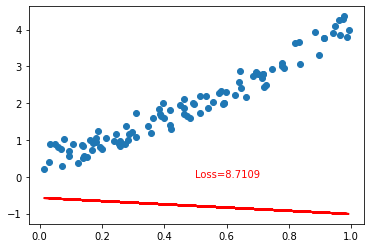

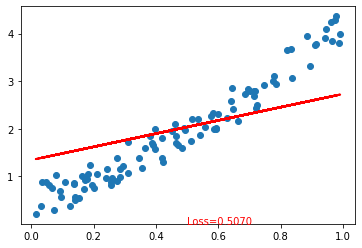

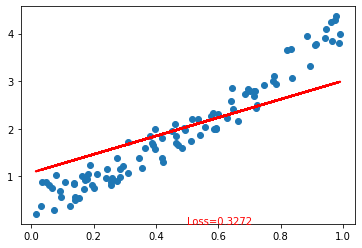

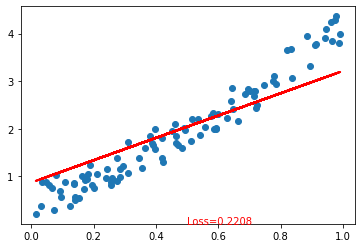

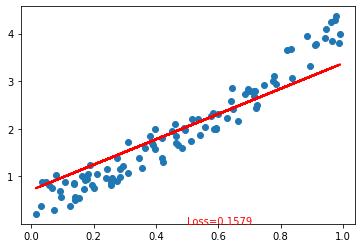

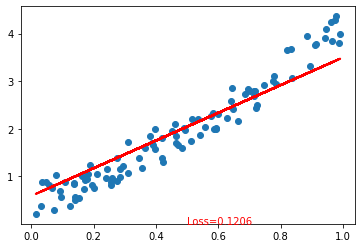

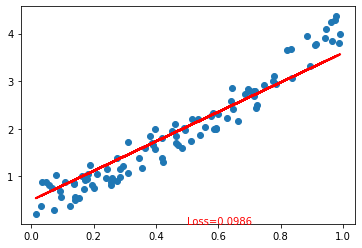

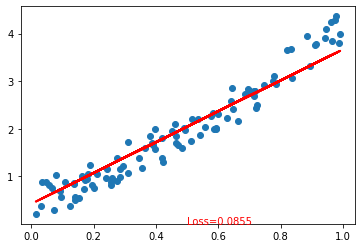

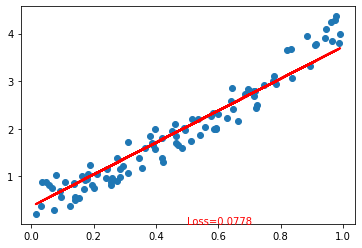

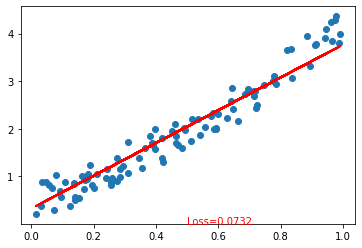

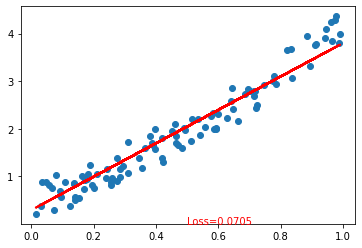

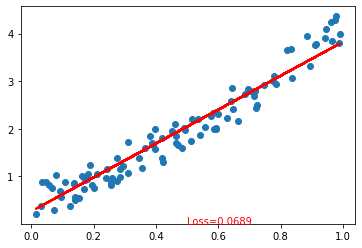

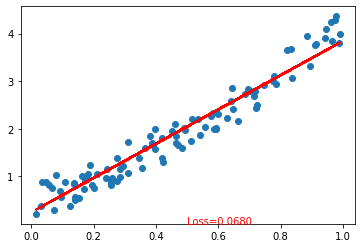

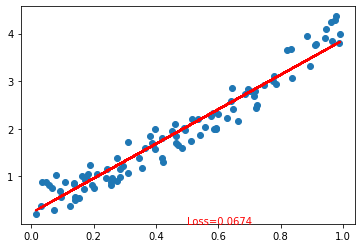

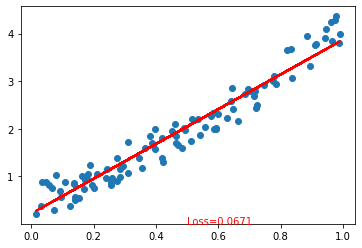

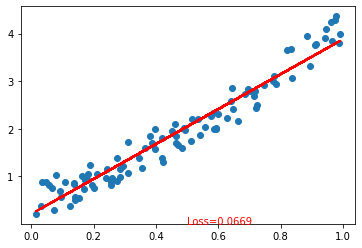

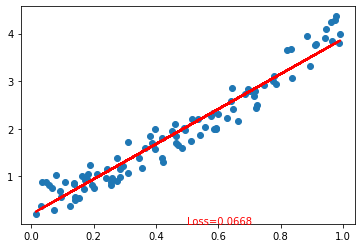

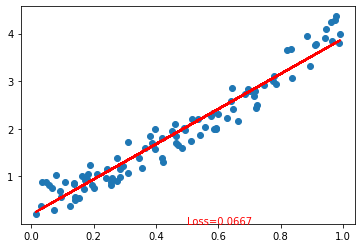

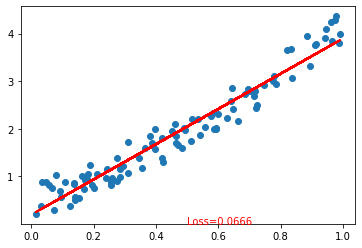

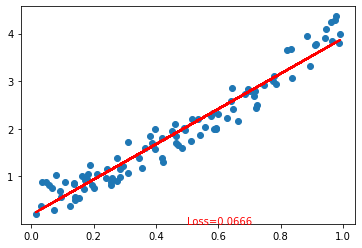

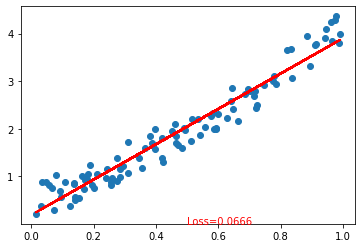

Epoch   205: reducing learning rate of group 0 to 2.0000e-02.


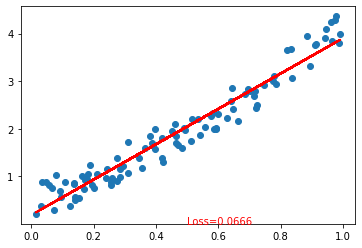

Epoch   212: reducing learning rate of group 0 to 2.0000e-03.
Epoch   218: reducing learning rate of group 0 to 2.0000e-04.


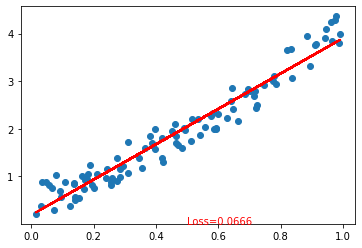

Epoch   224: reducing learning rate of group 0 to 2.0000e-05.
Epoch   230: reducing learning rate of group 0 to 2.0000e-06.


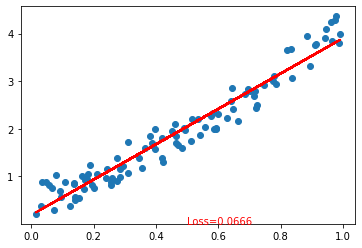

Epoch   236: reducing learning rate of group 0 to 2.0000e-07.


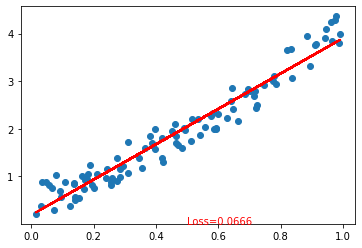

Epoch   242: reducing learning rate of group 0 to 2.0000e-08.
Epoch   248: reducing learning rate of group 0 to 2.0000e-09.


In [11]:
inputs = x
outputs = y

for i in range(250):

   # Forward prin rețeaua neurală
   prediction = net(inputs)

   #Calculăm loss-ul
   loss = loss_func(prediction, outputs)

   #Ștergem gradientul anterior
   optimizer.zero_grad()
   
   #Realizăm backpropagation. Obținem gradientul pentru parametrii rețelei neurale
   loss.backward()        
   
   #Updatăm parametrii rețelei în funcție de calculele făcute
   optimizer.step()    

   # Scheduler-ul de learning rate va decide dacă trebuie să scădem learning rate-ul
   scheduler.step(loss)

   if i % 10 == 0:
       # plot and show learning process
       plt.cla()
       plt.scatter(x.data.numpy(), y.data.numpy())
       plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
       plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
       plt.pause(0.1)

plt.show()